## LeNet implementation with Keras and MNIST dataset

### 1. Load MNIST database

MNIST is one of the most famous datasets in the field of machine learning
 - It has 70,000 images of hand-written digits
 - Very straight forward to download
 - Images dimensions are 28x28
 - Grayscale images

In [47]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 2. Data visualization

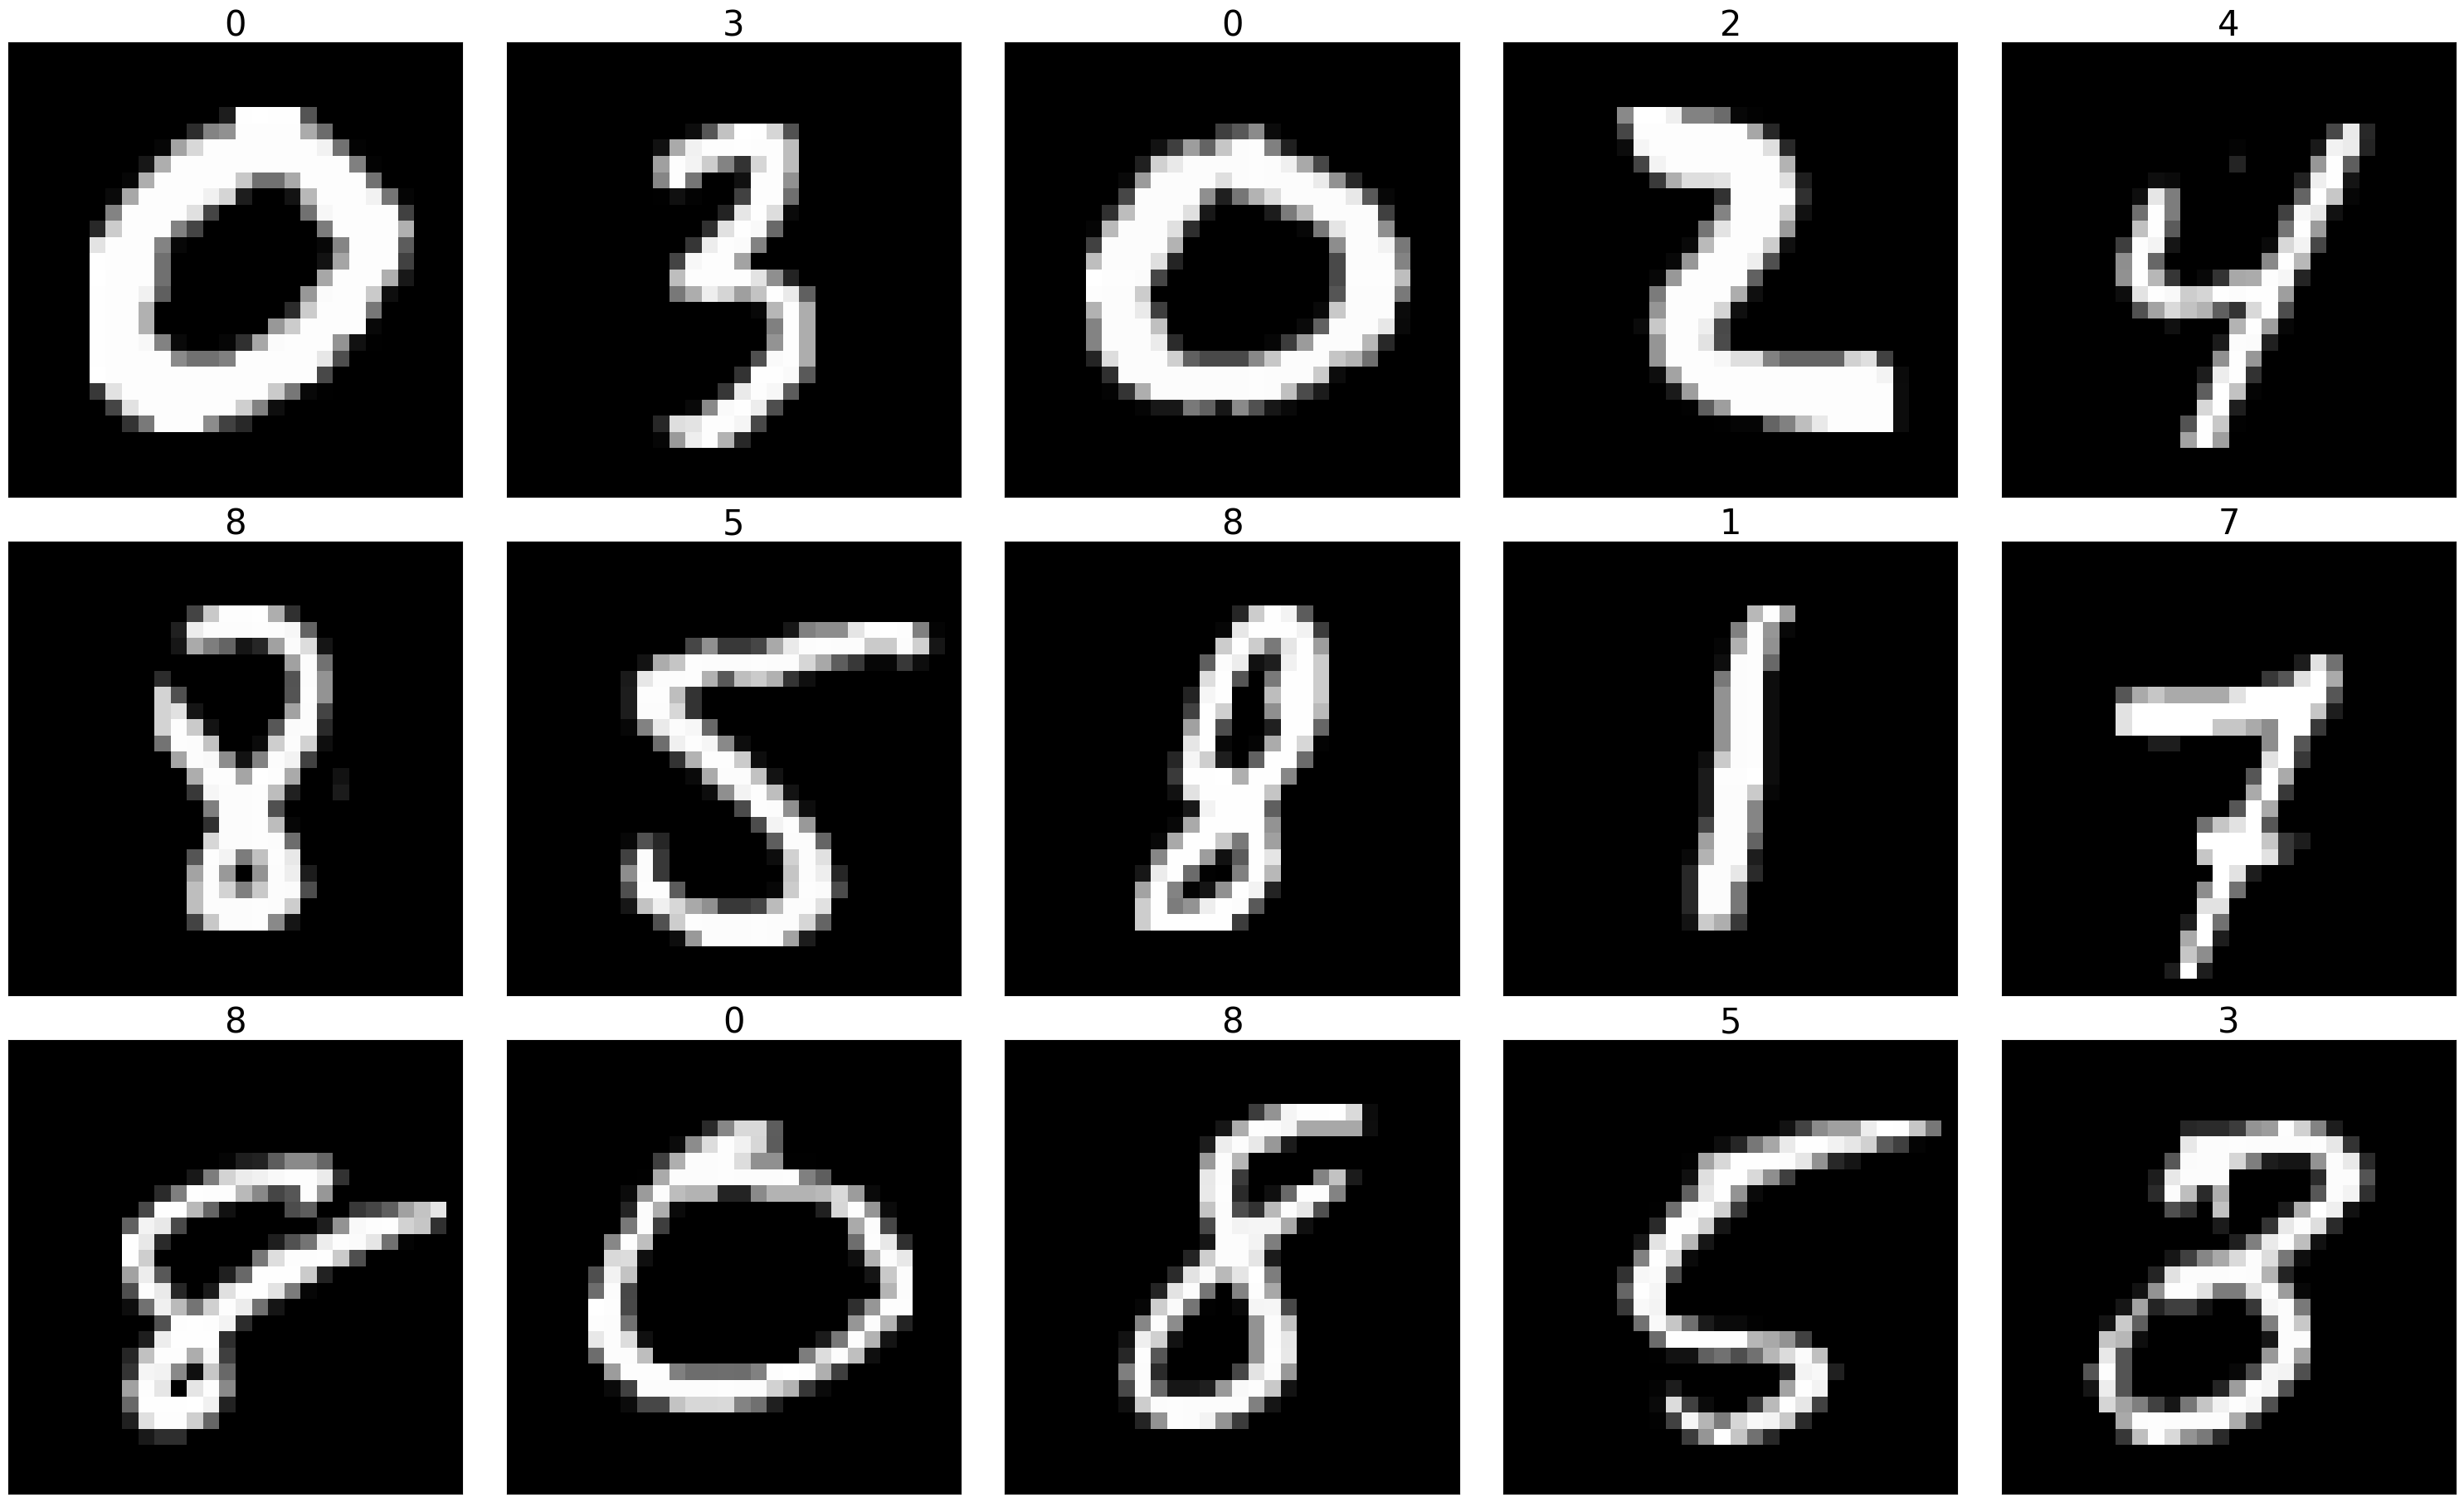

In [26]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(3,5,layout='constrained',figsize=(30,18))
for i,j in enumerate(np.random.choice(x_train.shape[0], 15, replace=False)):
    axs.flat[i].set_title(str(y_train[j]),color='black',size=30)
    axs.flat[i].imshow(x_train[j], cmap='gray')
    axs.flat[i].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)

plt.show()

### 3. Data normalization

In [48]:
mean = np.mean(x_train,axis=(0,1,2))
std = np.std(x_train,axis=(0,1,2))

x_train = x_train-mean/(std+1e-07)
x_test = x_test-mean/(std+1e-07)

### 4. One-Hot encoding

In [49]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### 5. Split data (validation data)

In [50]:
x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

print('x_train shape:', x_train.shape)
print('x_valid shape:', x_valid.shape)
print('x_test shape:', x_test.shape)

x_train shape: (55000, 28, 28)
x_valid shape: (5000, 28, 28)
x_test shape: (10000, 28, 28)


### 6. Reshape data to fit our CNN

In [51]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_valid = x_valid.reshape(x_valid.shape[0],x_valid.shape[1],x_valid.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

print('x_train shape:', x_train.shape)
print('x_valid shape:', x_valid.shape)
print('x_test shape:', x_test.shape)

x_train shape: (55000, 28, 28, 1)
x_valid shape: (5000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


### 7. Model architecture (LeNet)

![LeNet Architecture](images/lenet_architecture.png)
To implement LeNet-5 in Keras, read the [original paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) and extract the architecture information from pages 6, 7 and 8.

The resulting output when using the ```valid``` padding option has a spatial shape (number of rows or columns) of: ```output_shape = math.floor((input_shape - pool_size) / strides) + 1``` (consider in ```AveragePooling2D``` layers).

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

model = Sequential()

#C1 Convolutional Layer 
model.add(Conv2D(filters=6, kernel_size=(5,5), strides=1, padding='same', input_shape=(28,28,1), activation='tanh'))

#S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#C3 Convolutional Layer
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=1, padding='valid', activation='tanh'))

#S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

#C5 Convolutional Layer
model.add(Conv2D(filters=120, kernel_size=(5,5), strides=1, padding='valid', activation='tanh'))

#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

#FC6 
model.add(Dense(84, activation='tanh'))

#Output Layer
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

### 8. Compile the model (error function, optimizer and metrics)

In [55]:
#the loss function is categorical cross entropy since we have multiple classes (10) 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 9. Train the model

LeCun and his team used scheduled decay learning where the value of the learning rate was decreased using the following schedule: 0.0005 for the first two epochs, 0.0002 for the next three epochs, 0.00005 for the next four, and then 0.00001 thereafter. In the paper, the authors trained their network for 20 epochs.

In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler 

def lr_schedule(epoch):
    if epoch <= 2:
        lr = 5e-04
    elif epoch > 2 and epoch <= 5:
        lr = 2e-04
    elif epoch > 5 and epoch <= 9:
        lr = 5e-05
    else:
        lr = 1e-05
        
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

checkpointer = ModelCheckpoint(filepath='lenet.model.weights.best.keras', verbose=1, save_best_only=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_valid, y_valid), callbacks=[checkpointer, lr_scheduler],
              verbose=2, shuffle=True)

Epoch 1/20

Epoch 1: val_loss improved from inf to 0.10049, saving model to lenet.model.weights.best.keras
1719/1719 - 8s - 5ms/step - accuracy: 0.9395 - loss: 0.2059 - val_accuracy: 0.9688 - val_loss: 0.1005 - learning_rate: 5.0000e-04
Epoch 2/20

Epoch 2: val_loss improved from 0.10049 to 0.06875, saving model to lenet.model.weights.best.keras
1719/1719 - 7s - 4ms/step - accuracy: 0.9768 - loss: 0.0745 - val_accuracy: 0.9780 - val_loss: 0.0688 - learning_rate: 5.0000e-04
Epoch 3/20

Epoch 3: val_loss improved from 0.06875 to 0.05546, saving model to lenet.model.weights.best.keras
1719/1719 - 7s - 4ms/step - accuracy: 0.9825 - loss: 0.0553 - val_accuracy: 0.9842 - val_loss: 0.0555 - learning_rate: 5.0000e-04
Epoch 4/20

Epoch 4: val_loss improved from 0.05546 to 0.04054, saving model to lenet.model.weights.best.keras
1719/1719 - 7s - 4ms/step - accuracy: 0.9900 - loss: 0.0347 - val_accuracy: 0.9882 - val_loss: 0.0405 - learning_rate: 2.0000e-04
Epoch 5/20

Epoch 5: val_loss did not im

### 9. Load the model with the best classification accuracy on the validation set and Calculate the accuracy on the test set

In [104]:
model.load_weights('best_weights/lenet.model.weights.best.keras')

score = model.evaluate(x_test, y_test, verbose=0)
loss, accuracy = score[0], score[1]

print(f"loss = {round(100*loss,4)}%\naccuracy = {round(100*accuracy,4)}%")

loss = 2.86%
accuracy = 99.05%


### 10. Visualize some predictions

In [69]:
y_hat = model.predict(x_test)

mnist_labels = [str(_) for _ in range(10)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


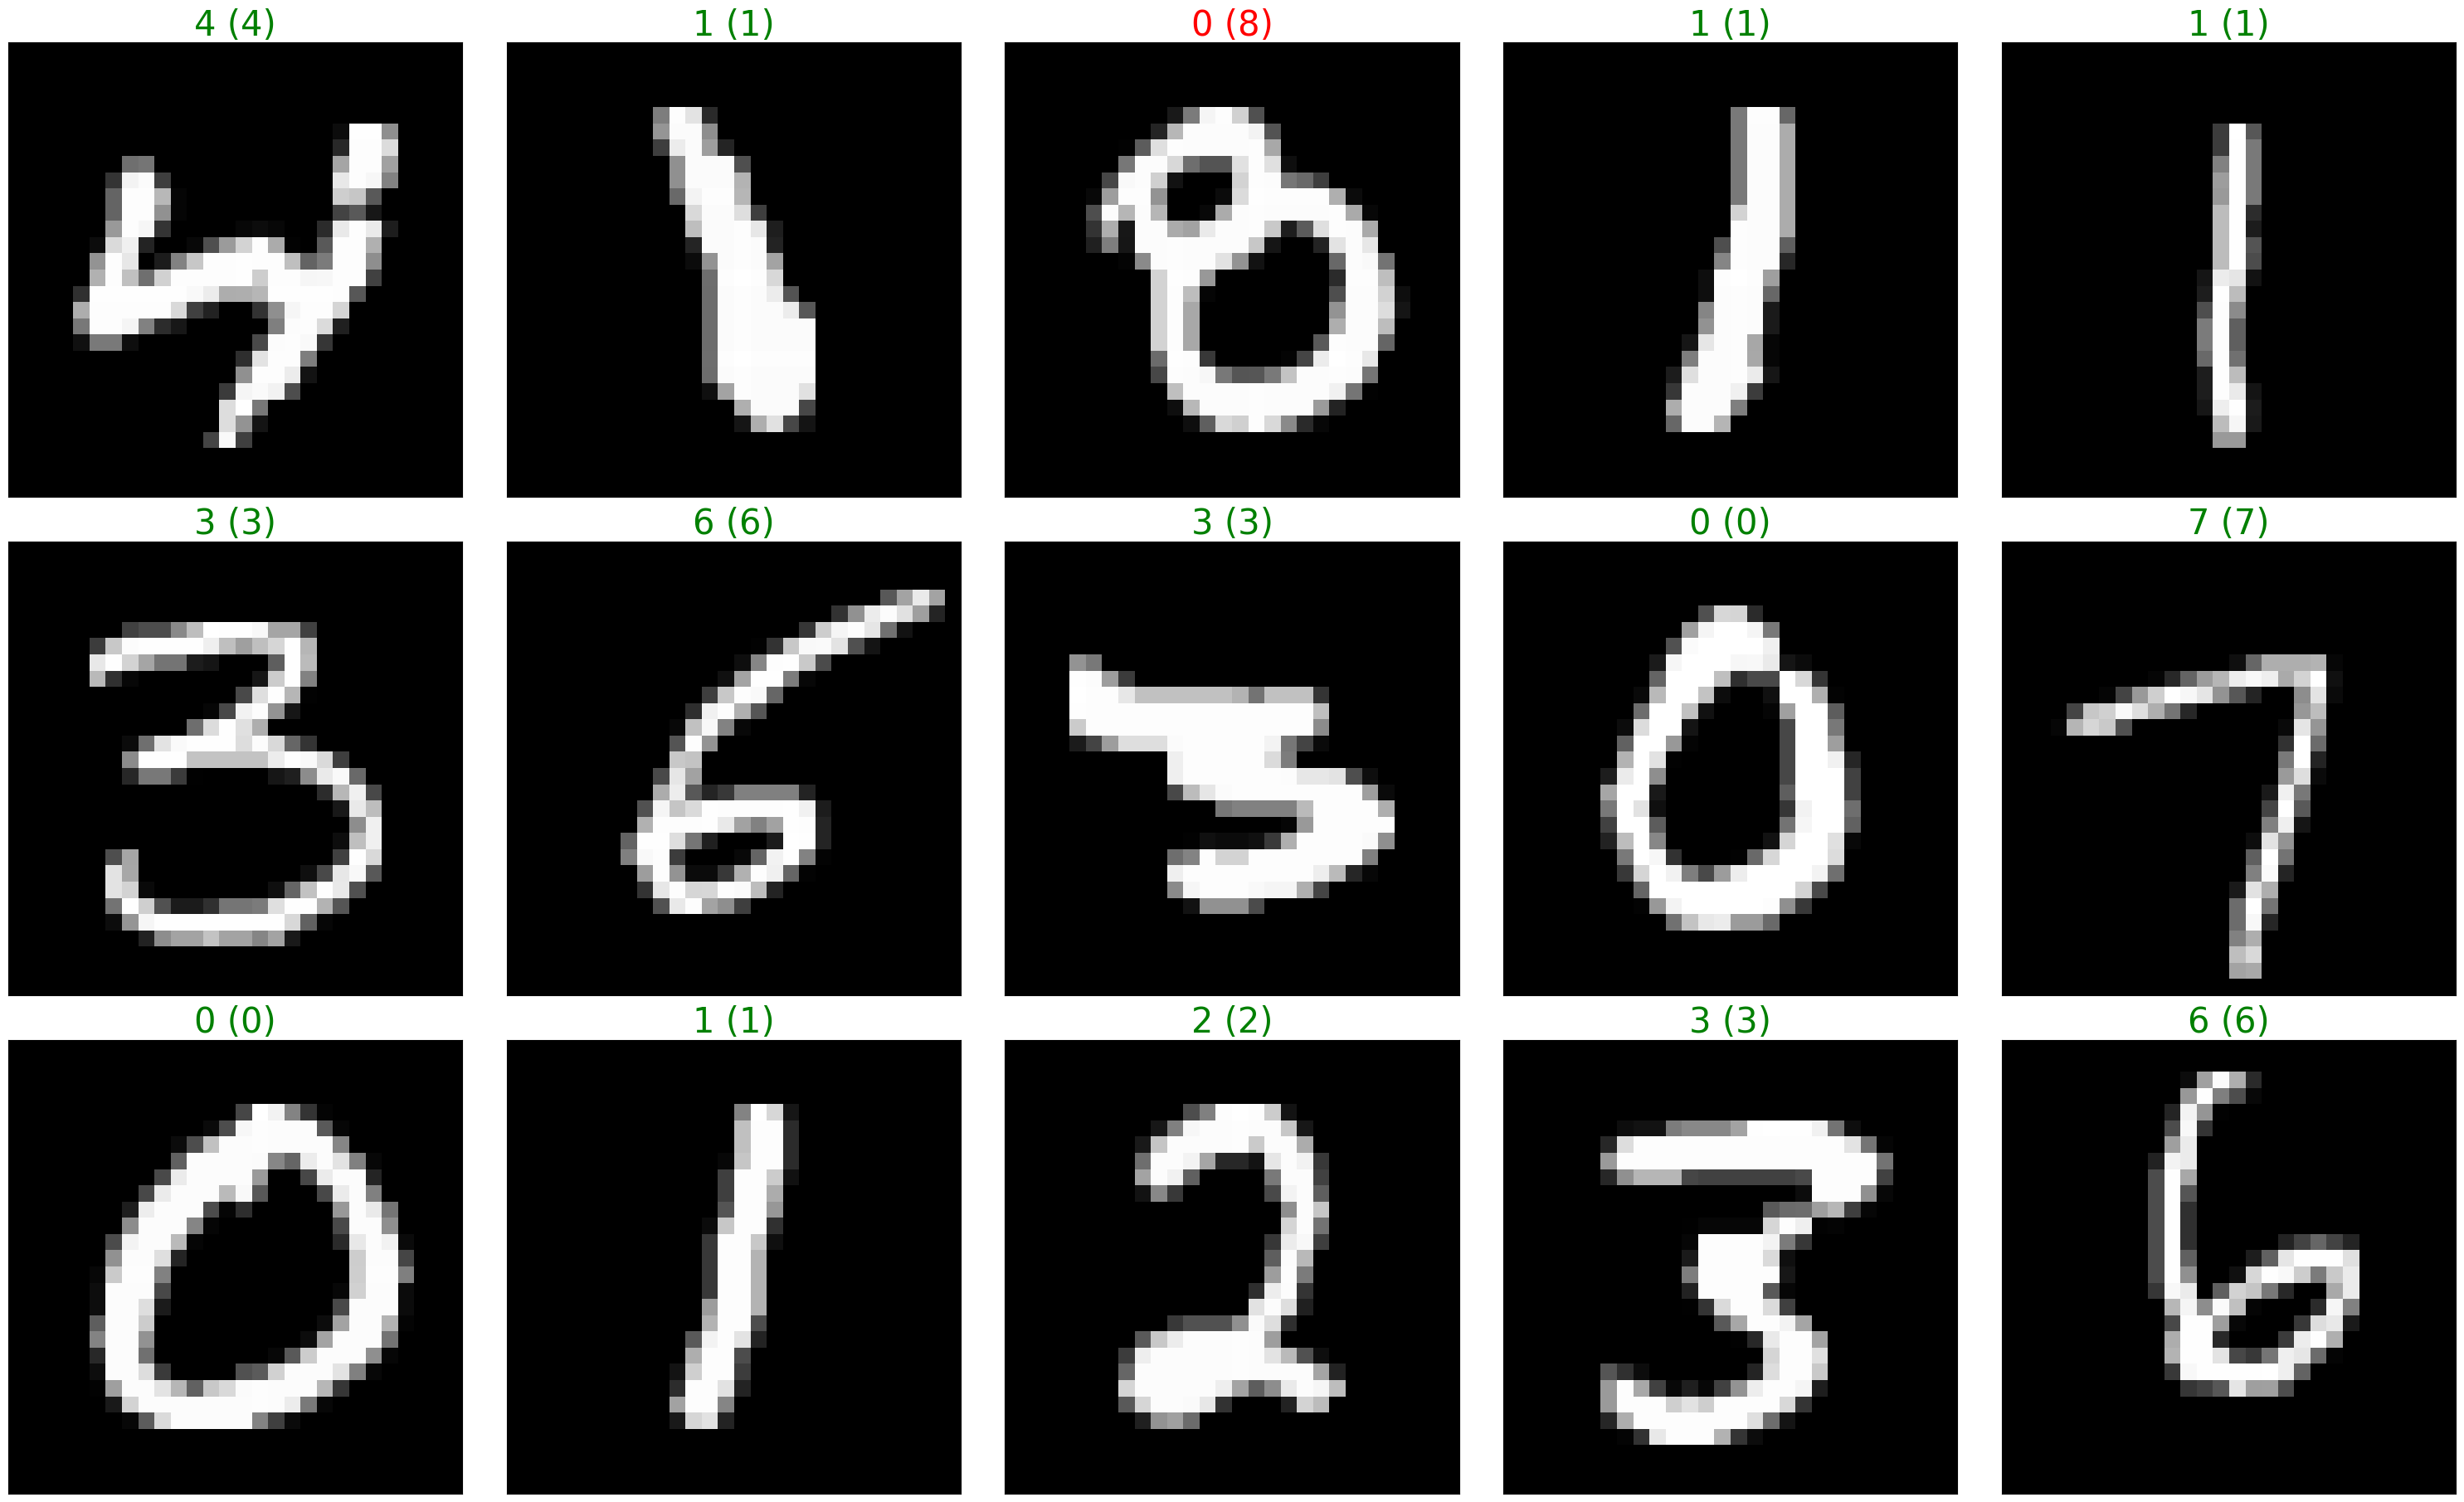

In [103]:
fig, axs = plt.subplots(3,5,layout='constrained',figsize=(30,18))
for i,j in enumerate(np.random.choice(x_test.shape[0], size=15, replace=True)):
    axs.flat[i].imshow(x_test[j], cmap='gray')
    axs.flat[i].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
    pred_idx = np.argmax(y_hat[j])
    true_idx = np.argmax(y_test[j])
    axs.flat[i].set_title("{} ({})".format(mnist_labels[pred_idx],mnist_labels[true_idx]),
                 color='green' if pred_idx == true_idx else 'red', size=30)

### 11. Accuracy and loss curves

In [80]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

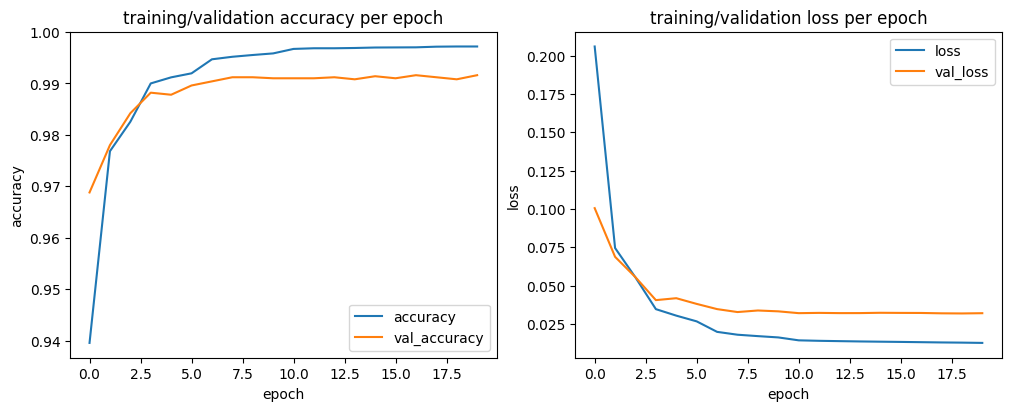

In [102]:
fig, axs = plt.subplots(1,2,layout='constrained',figsize=(10,4))
axs[0].set_title('training/validation accuracy per epoch')
axs[0].plot(hist.history['accuracy'], label='accuracy')
axs[0].plot(hist.history['val_accuracy'], label='val_accuracy')
axs[0].legend()
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('accuracy')

axs[1].set_title('training/validation loss per epoch')
axs[1].plot(hist.history['loss'], label='loss')
axs[1].plot(hist.history['val_loss'], label='val_loss')
axs[1].legend()
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('loss')

plt.show()